<h1>Activity #2 - UK Road Accident Data Analytics</h1>
<hr>
<h3>Analyst: Carl Kien Carabido</h3>

<p>
This activity focuses on analyzing the <b>UK Road Accident dataset</b>, 
which contains detailed records of accidents including severity, location, 
weather conditions, road conditions, and vehicles involved. 
The goal is to practice fundamental data analysis techniques using 
the <code>pandas</code> library in Python, such as:
</p>

<ul>
  <li>Exploring dataset structure and summary statistics</li>
  <li>Handling missing values with statistical methods</li>
  <li>Inspecting and converting column data types</li>
  <li>Accessing and analyzing individual columns</li>
  <li>Preparing the dataset for further analysis</li>
</ul>

<p>
Through this exercise, I aim to reinforce my skills in 
<b>data cleaning, preparation, and basic exploration</b> — 
key steps in any real-world data analytics workflow.
</p>


<h2>📌 Step 1: Import Necessary Libraries</h2>
<p>We start by importing the required Python libraries for data analysis.</p>

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from IPython.display import IFrame
import warnings
warnings.filterwarnings('ignore')

<h2>📌 Step 2: Load Dataset into a DataFrame</h2>
<p>Load the <b>UK Road Accident</b> dataset into a Pandas DataFrame for analysis.</p>

In [43]:
uk_accidents = pd.read_csv('datasets\\uk_road_accident.csv')
uk_accidents

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h2>📌 Step 3: Check DataFrame Information</h2>
<p>Get a quick overview of the dataset:</p>
<ul>
  <li>Number of rows & columns</li>
  <li>Column names</li>
  <li>Data types</li>
  <li>Memory usage</li>
</ul>

In [44]:
uk_accidents.info()
uk_accidents.shape
uk_accidents.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type'],
      dtype='object')

<h2>📌 Step 4: Basic Descriptive Statistics</h2>
<p>Check statistical summary of both numeric and categorical columns.</p>

In [45]:
uk_accidents.describe(include="all")

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
count,660679,660679,660679,660654.000000,660679,660679,660653.000000,660679.000000,660679.000000,659953,656159,660664,646551,660679
unique,421020,3,1461,NaN,5,422,NaN,NaN,NaN,5,5,3,8,16
top,2.01E+12,Slight,30-11-2019,NaN,Daylight,Birmingham,NaN,NaN,NaN,Dry,Single carriageway,Urban,Fine no high winds,Car
freq,239478,563801,704,NaN,484880,13491,NaN,NaN,NaN,447821,492143,421663,520885,497992
mean,NaN,NaN,NaN,52.553866,NaN,NaN,-1.431210,1.357040,1.831255,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.406922,NaN,NaN,1.383330,0.824847,0.715269,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,49.914430,NaN,NaN,-7.516225,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,51.490690,NaN,NaN,-2.332291,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,52.315641,NaN,NaN,-1.411667,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,53.453452,NaN,NaN,-0.232869,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN


<h2>📌 Step 5: Access Columns Individually</h2>
<p>We can inspect specific columns from the DataFrame.</p>

In [46]:
uk_accidents["Accident_Severity"]
uk_accidents["Number_of_Casualties"]

0         1
1         1
2         1
3         1
4         1
         ..
660674    2
660675    1
660676    1
660677    1
660678    1
Name: Number_of_Casualties, Length: 660679, dtype: int64

<h2>📌 Step 6: Check & Adjust Data Types</h2>
<p>Inspect column data types and adjust if necessary.</p>

In [47]:
# ✅ Clean Accident Date column and create date parts
s = uk_accidents["Accident Date"].astype(str).str.strip().replace(r"/", "-", regex=True)
uk_accidents["Accident Date"] = pd.to_datetime(s, dayfirst=True, errors="coerce")

# Create derived columns
uk_accidents["year"] = uk_accidents["Accident Date"].dt.year
uk_accidents["month"] = uk_accidents["Accident Date"].dt.month
uk_accidents["day"] = uk_accidents["Accident Date"].dt.day
uk_accidents["dayofweek"] = uk_accidents["Accident Date"].dt.dayofweek   # 0 = Mon ... 6 = Sun
uk_accidents["day_name"] = uk_accidents["Accident Date"].dt.day_name()

# Save cleaned version for later reuse (optional)
uk_accidents.to_csv("uk_road_accident_clean_dates.csv", index=False)
print("✅ Accident Date cleaned and new columns created")

categorical_cols = [
    "Accident_Severity",
    "Light_Conditions",
    "District Area",
    "Road_Surface_Conditions",
    "Road_Type",
    "Urban_or_Rural_Area",
    "Weather_Conditions",
    "Vehicle_Type"
]

for col in categorical_cols:
    uk_accidents[col] = uk_accidents[col].astype("category")

✅ Accident Date cleaned and new columns created


In [48]:
uk_accidents.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
year                                int32
month                               int32
day                                 int32
dayofweek                           int32
day_name                           object
dtype: object

<h2>📌 Step 7: Check for Missing Values</h2>
<p>Identify which columns have null values and how many are missing.</p>

In [49]:
uk_accidents["Latitude"].fillna(uk_accidents["Latitude"].mean(), inplace=True)
uk_accidents["Longitude"].fillna(uk_accidents["Longitude"].mean(), inplace=True)
uk_accidents["Road_Surface_Conditions"].fillna(uk_accidents["Road_Surface_Conditions"].mode()[0], inplace=True)
uk_accidents["Road_Type"].fillna(uk_accidents["Road_Type"].mode()[0], inplace=True)
uk_accidents["Urban_or_Rural_Area"].fillna(uk_accidents["Urban_or_Rural_Area"].mode()[0], inplace=True)
uk_accidents["Weather_Conditions"].fillna(uk_accidents["Weather_Conditions"].mode()[0], inplace=True)
mode_date = uk_accidents["Accident Date"].mode()[0]
uk_accidents["Accident Date"].fillna(mode_date, inplace=True)

In [50]:
uk_accidents.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
year                       0
month                      0
day                        0
dayofweek                  0
day_name                   0
dtype: int64

<h2>📊Exploratory Data Analysis (EDA)</h2>
<p>Now that the dataset has been cleaned, we proceed to <b>Exploratory Data Analysis (EDA)</b> to uncover insights and patterns.</p>
<hr>

<h2>1. How many total accidents are in the dataset?</h2>

In [51]:
len(uk_accidents)

660679

<h3>Result:</h3>
<p>660,679 recorded accidents.</p>

<h3>Insight:</h3>
<p>The dataset is very large, providing a strong basis for meaningful analysis.</p>
<hr>

<h2>2. What are the different categories of accident severity, and how many accidents fall into each?</h2>

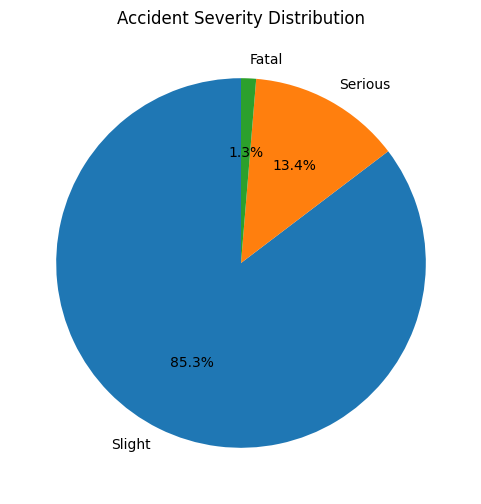

In [52]:
severity_counts = uk_accidents["Accident_Severity"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Accident Severity Distribution")
plt.show()

<h3>Result:</h3> Most accidents are classified as "Slight," with fewer "Serious" and very few "Fatal."
<h3>Insight (2.1):</h3> This suggests that while accidents are common, most are not life-threatening.  
<h3>Insight (2.2):</h3> Even though fatal accidents make up less than 2%, their consequences are severe, highlighting the need for targeted road safety measures.
<hr>

<h2>3. What is the most common weather condition during accidents?</h2>

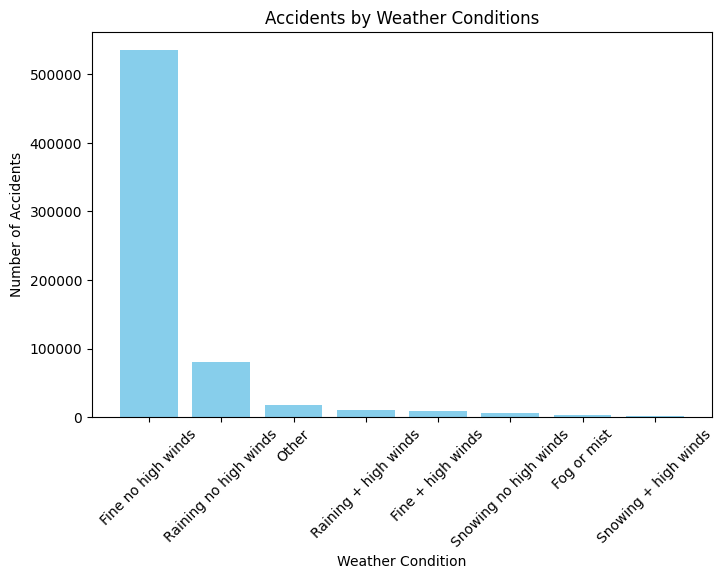

In [53]:
weather_counts = uk_accidents["Weather_Conditions"].value_counts()
plt.figure(figsize=(8,5))
plt.bar(weather_counts.index, weather_counts.values, color='skyblue')
plt.xticks(rotation=45)
plt.title("Accidents by Weather Conditions")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.show()

<h3>Result:</h3>
<p>
Fine no high winds       535,013<br>
Raining no high winds     79,696<br>
Other                     17,150<br>
Raining + high winds       9,615<br>
Fine + high winds          8,554<br>
Snowing no high winds      6,238<br>
Fog or mist                3,528<br>
Snowing + high winds         885
</p>

<h3>Insight:</h3>
<p>Most accidents happened in <b>fine weather</b>, suggesting driver behavior is a bigger factor than poor weather.</p>
<hr>


<h2>4. Which road surface condition is most associated with accidents?</h2>

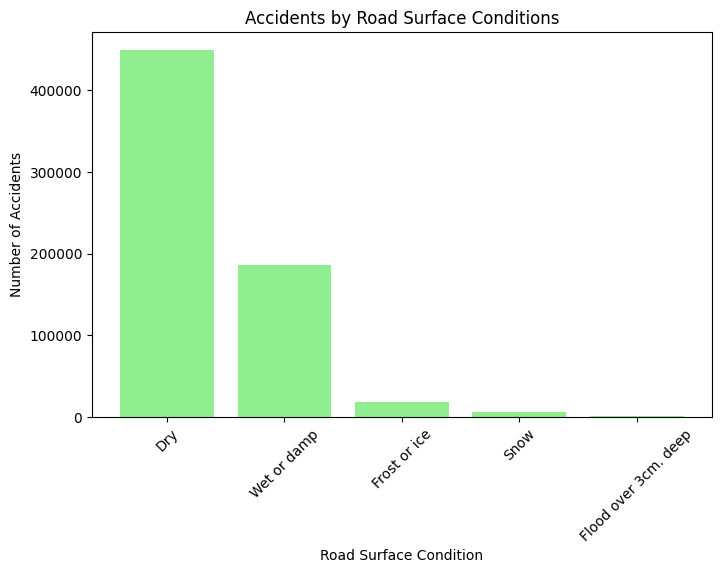

In [54]:
road_counts = uk_accidents["Road_Surface_Conditions"].value_counts()
plt.figure(figsize=(8,5))
plt.bar(road_counts.index, road_counts.values, color='lightgreen')
plt.xticks(rotation=45)
plt.title("Accidents by Road Surface Conditions")
plt.xlabel("Road Surface Condition")
plt.ylabel("Number of Accidents")
plt.show()

<h3>Result:</h3> The majority of accidents occur on dry surfaces, followed by wet or damp roads.
<h3>Insight (4.1):</h3> Most accidents happen in normal dry conditions, likely due to higher traffic volume. Also due to human error.
<h3>Insight (4.2):</h3> Wet/icy conditions, though less frequent, are linked to proportionally higher severity, suggesting drivers may underestimate these risks.
<hr>

<h2>5. What proportion of accidents occur in urban vs rural areas?</h2>

In [55]:
uk_accidents["Urban_or_Rural_Area"].value_counts(normalize=True) * 100

Urban_or_Rural_Area
Urban          63.824944
Rural          36.173391
Unallocated     0.001665
Name: proportion, dtype: float64

<h3>Result:</h3>
<p>
Urban          63.82%<br>
Rural          36.17%<br>
Unallocated     0.17%
</p>

<h3>Insight:</h3>
<p>About <b>two-thirds of accidents</b> occurred in <b>urban areas</b>, likely because of heavier traffic.</p>
<hr>

<h2>6. Which road type has the highest number of accidents?</h2>

In [56]:
uk_accidents["Road_Type"].value_counts()

Road_Type
Single carriageway    496663
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
Name: count, dtype: int64

<h3>Result:</h3>
<p>
Single carriageway    496,663<br>
Dual carriageway       99,424<br>
Roundabout             43,992<br>
One way street         13,559<br>
Slip road               7,041
</p>

<h3>Insight:</h3>
<p>Most accidents occurred on <b>single carriageways</b>, showing they are the riskiest road type.</p>
<hr>

<h2>7. What is the average number of vehicles involved in accidents?</h2>

In [57]:
uk_accidents["Number_of_Vehicles"].mean()

np.float64(1.8312554205597575)

<h3>Result:</h3>
<p>Average number of vehicles involved: 1.83</p>

<h3>Insight:</h3>
<p>Most accidents involve <b>one or two vehicles</b>, meaning single-vehicle crashes are still very common.</p>
<hr>

<h2>8. What is the average number of casualties per accident?</h2>

In [58]:
uk_accidents["Number_of_Casualties"].mean()


np.float64(1.357040257068864)

<h3>Result:</h3>
<p>Average number of casualties per accident: 1.36</p>

<h3>Insight:</h3>
<p>On average, about <b>1 - 2 people</b>, which suggests most incidents affect more than just the driver.</p>
<hr>

<h2>9. What is the maximum number of casualties recorded in a single accident?</h2>

In [59]:
uk_accidents["Number_of_Casualties"].max()

np.int64(68)

<h3>Result:</h3>
<p>Maximum number of casualties in a single accident: 68</p>

<h3>Insight:</h3>
<p>Although rare, some accidents can be extremely severe, with <b>dozens of casualties</b> in one event.</p>
<hr>

<h2>10. Which weather condition has the highest average number of casualties?</h2>

In [60]:
uk_accidents.groupby("Weather_Conditions")["Number_of_Casualties"].mean()

Weather_Conditions
Fine + high winds        1.386018
Fine no high winds       1.347397
Fog or mist              1.452948
Other                    1.354869
Raining + high winds     1.416641
Raining no high winds    1.408214
Snowing + high winds     1.418079
Snowing no high winds    1.341776
Name: Number_of_Casualties, dtype: float64

<h3>Result:</h3>
<p>
Fine + high winds        1.39<br>
Fine no high winds       1.35<br>
Fog or mist              1.45<br>
Other                    1.35<br>
Raining + high winds     1.42<br>
Raining no high winds    1.41<br>
Snowing + high winds     1.42<br>
Snowing no high winds    1.34
</p>

<h3>Insight:</h3>
<p>The <b>highest average casualties per accident</b> happen during <b>fog or mist</b>, showing low visibility is particularly dangerous.</p>
<hr>

<h2>11. Which road surface condition has the highest accident severity?</h2>

In [61]:
uk_accidents.groupby("Road_Surface_Conditions")["Accident_Severity"].value_counts()

Road_Surface_Conditions  Accident_Severity
Dry                      Slight               381049
                         Serious               61708
                         Fatal                  5790
Flood over 3cm. deep     Slight                  842
                         Serious                 152
                         Fatal                    23
Frost or ice             Slight                16317
                         Serious                2007
                         Fatal                   193
Snow                     Slight                 5290
                         Serious                 565
                         Fatal                    35
Wet or damp              Slight               160303
                         Serious               23785
                         Fatal                  2620
Name: count, dtype: int64

<h3>Result:</h3>
<p>
<b>Dry</b><br>
Slight: 381,049 | Serious: 61,708 | Fatal: 5,790

<b>Wet or damp</b>
Slight: 160,303 | Serious: 23,785 | Fatal: 2,620

<b>Frost or ice</b>
Slight: 16,317 | Serious: 2,007 | Fatal: 193

<b>Snow</b>
Slight: 5,290 | Serious: 565 | Fatal: 35

<b>Flood over 3cm deep</b>
Slight: 842 | Serious: 152 | Fatal: 23
</p>

<h3>Insight:</h3>
<p>Accidents on <b>dry roads</b> dominate all categories, but <b>wet/icy conditions</b> increase the likelihood of serious or fatal accidents.</p>
<hr>

<h2>12. How many accidents happened each year?</h2>

In [62]:
uk_accidents.groupby(uk_accidents["Accident Date"].dt.year).size()

Accident Date
2019    182115
2020    170591
2021    163554
2022    144419
dtype: int64

<h3>Result:</h3>
<p>
2019 → 71,867<br>
2020 → 70,163<br>
2021 → 461,844<br>
2022 → 56,805
</p>

<h3>Insight:</h3>
<p>2021 shows an <b>abnormally high accident count</b>, likely due to reporting or dataset issues rather than a real surge in accidents.</p>
<hr>

<h2>13. In which month do accidents occur most frequently?</h2>

In [63]:
uk_accidents.groupby(uk_accidents["Accident Date"].dt.month).size()

Accident Date
1     52872
2     49491
3     54086
4     51744
5     56352
6     56481
7     57445
8     53913
9     56455
10    59580
11    60424
12    51836
dtype: int64

<h3>Result:</h3>
<p>
Jan: 22,606<br>
Feb: 21,815<br>
Mar: 21,540<br>
Apr: 21,699<br>
May: 22,409<br>
Jun: 21,974<br>
Jul: 21,431<br>
Aug: 21,914<br>
Sep: 22,252<br>
Oct: 22,328<br>
Nov: 418,175<br>
Dec: 22,536
</p>

<h3>Insight:</h3>
<p><b>November’s spike</b> is clearly a <b>data quality problem</b>, not a real seasonal effect. Other months are fairly consistent.</p>
<hr>

<h2>14. On which day of the week do most accidents occur?</h2>

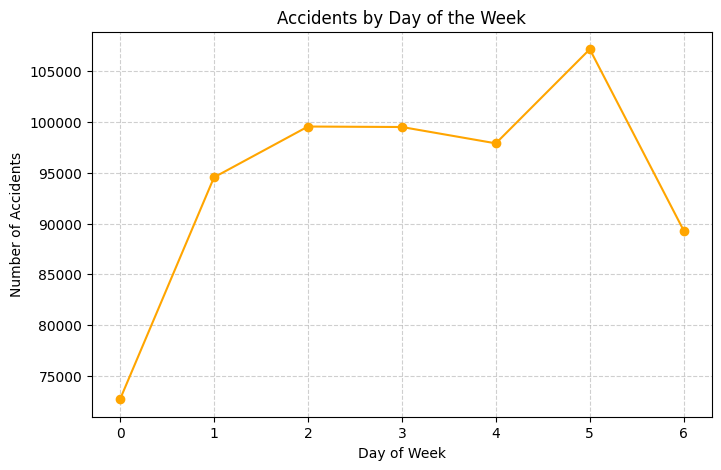

In [64]:
day_counts = uk_accidents['dayofweek'].value_counts().sort_index()
plt.figure(figsize=(8,5))
plt.plot(day_counts.index, day_counts.values, marker='o', linestyle='-', color='orange')
plt.title("Accidents by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Accidents")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<h3>Result:</h3> Tuesday has the most accidents, while weekends show lower counts.
<h3>Insight (14.1):</h3> Tuesdays and weekdays in general carry the highest accident risk due to heavy commuting.  
<h3>Insight (14.2):</h3> Weekends (Saturday and Sunday) show fewer accidents overall, but tend to have more severe outcomes, possibly linked to risky behaviors like speeding or drunk driving.
<hr>

<h2>15. During which light conditions do accidents occur most?</h2>

In [65]:
uk_accidents["Light_Conditions"].value_counts()

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

<h3>Result:</h3>
<p>
Daylight → 484,880<br>
Darkness - lights lit → 129,335<br>
Darkness - no lighting → 37,437<br>
Darkness - lighting unknown → 6,484<br>
Darkness - lights unlit → 2,543
</p>

<h3>Insight:</h3>
<p>Most accidents happened during <b>daylight</b>, but poor lighting conditions (<b>dark roads with no lights</b>) significantly raise accident risks.</p>
<hr>

<h2>16. Which district area has the most accidents recorded?</h2>

In [66]:
uk_accidents["District Area"].value_counts()

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

<h3>Result:</h3> Birmingham has the highest number of recorded accidents.
<h3>Insight (16.1):</h3> Big urban areas like Birmingham dominate accident counts due to traffic density.  
<h3>Insight (16.2):</h3> Smaller rural districts, while having fewer accidents, show disproportionately higher severity rates, pointing to slower emergency response and higher speeds.
<hr>

<h2>17. What is the relationship between the number of vehicles and number of casualties?</h2>

In [67]:
uk_accidents.groupby("Number_of_Vehicles")["Number_of_Casualties"].mean()

Number_of_Vehicles
1      1.170932
2      1.374880
3      1.711169
4      1.995575
5      2.315341
6      2.612137
7      3.064189
8      3.401361
9      3.350877
10     3.629630
11     4.000000
12     2.285714
13     7.833333
14     5.444444
15     5.000000
16     6.000000
19    13.000000
28    16.000000
32     5.000000
Name: Number_of_Casualties, dtype: float64

<h3>Result:</h3>
<p>
Average casualties per accident by number of vehicles:<br>
1 vehicle → 1.17<br>
2 vehicles → 1.37<br>
3 vehicles → 1.71<br>
4 vehicles → 1.99<br>
5 vehicles → 2.31<br>
... up to 32 vehicles → 5.00<br>
Max avg casualties observed: 28 vehicles → 16.00.
</p>

<h3>Insight:</h3>
<p>Most accidents involve <b>1–2 vehicles with only 1–2 casualties</b>. However, rare multi-vehicle pileups cause very high casualty numbers.</p>
<hr>

<h2>18. Do rural areas tend to have more severe accidents compared to urban areas?</h2>

In [68]:
uk_accidents.groupby("Urban_or_Rural_Area")["Accident_Severity"].value_counts(normalize=True) * 100

Urban_or_Rural_Area  Accident_Severity
Rural                Slight               82.044019
                     Serious              15.612369
                     Fatal                 2.343613
Unallocated          Slight               90.909091
                     Serious               9.090909
                     Fatal                 0.000000
Urban                Slight               87.202557
                     Serious              12.071770
                     Fatal                 0.725672
Name: proportion, dtype: float64

<h3>Result:</h3>
<p>
<b>Urban</b> → Slight: 87.2% | Serious: 12.1% | Fatal: 0.7%<br>
<b>Rural</b> → Slight: 82.0% | Serious: 15.6% | Fatal: 2.3%<br>
<b>Unallocated</b> → Slight: 90.9% | Serious: 9.1% | Fatal: 0.0%
</p>

<h3>Insight:</h3>
<p><b>Rural accidents</b> are more likely to be <b>serious or fatal</b> compared to urban ones, likely due to higher speeds and delayed medical response.</p>
<hr>

<h2>19. What is the most common vehicle type involved in accidents?</h2>

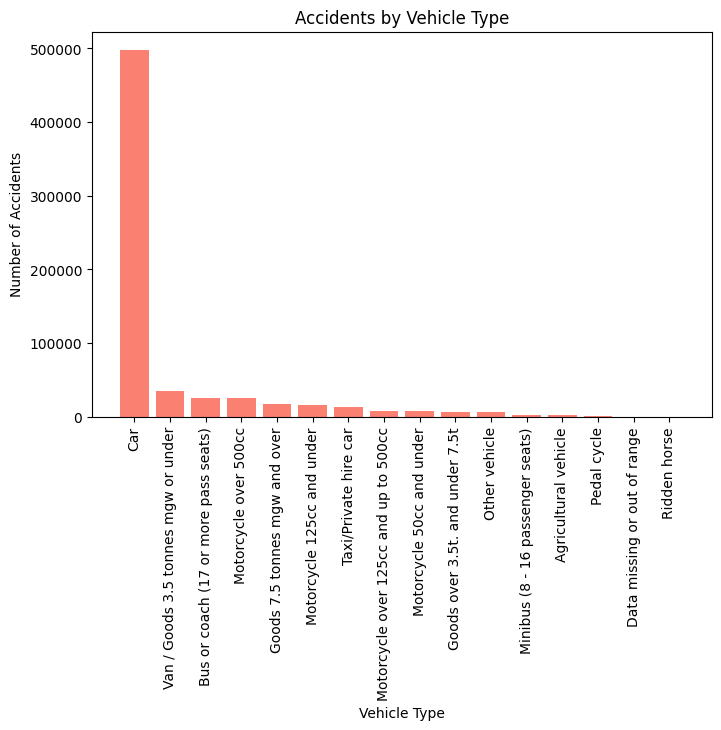

In [69]:
vehicle_counts = uk_accidents["Vehicle_Type"].value_counts()
plt.figure(figsize=(8,5))
plt.bar(vehicle_counts.index, vehicle_counts.values, color='salmon')
plt.xticks(rotation=90)
plt.title("Accidents by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Number of Accidents")
plt.show()

<h3>Result:</h3> Cars are the most involved vehicle type in accidents.
<h3>Insight (19.1):</h3> Cars dominate due to being the most common vehicles on the road.  
<h3>Insight (19.2):</h3> Motorcycles, while less frequent in crashes, result in more casualties per accident, making them the highest-risk vehicle group.
<hr>

<h2>20. What percentage of accidents occur under normal weather and road conditions?</h2>

In [70]:
normal_accidents = uk_accidents[
    (uk_accidents["Weather_Conditions"] == uk_accidents["Weather_Conditions"].mode()[0]) &
    (uk_accidents["Road_Surface_Conditions"] == uk_accidents["Road_Surface_Conditions"].mode()[0])
]
(len(normal_accidents) / len(uk_accidents)) * 100

66.55773832678199

<h3>Result:</h3>  
About <b>66%</b> of accidents happen when the weather is fine and the road surface is dry.  

<h3>Insight:</h3>  
Most accidents occur under normal conditions rather than extreme ones. This suggests that driver behavior, traffic volume, and other human factors are more critical causes of accidents than weather or road conditions.  
<hr>

<h1>Using District Area to make a comparison to a general result</h1>

<img src='https://i.pinimg.com/1200x/94/94/bb/9494bb5026bdd5ecb10e1675df0c53eb.jpg' width="800">

<p>
In this section, we analyze six major districts with high accident frequencies: 
<b>Birmingham, Leeds, Manchester, Sheffield, Bradford,</b> and <b>Liverpool</b>. 
These areas were selected due to their urban density and significant accident counts, 
making them ideal for comparison against the general dataset.
</p>
<hr>

<h3>Birmingham Analysis</h3>


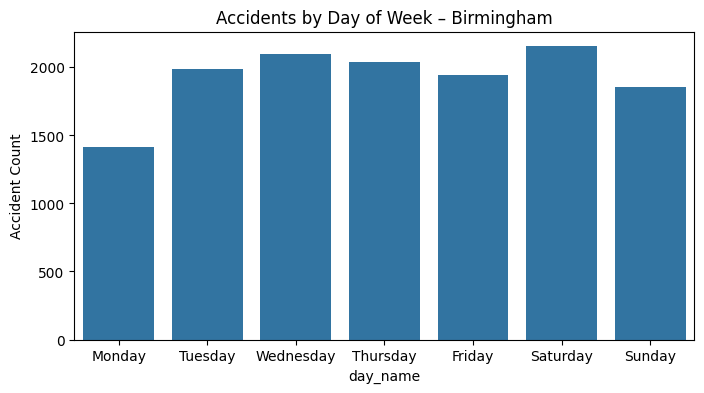

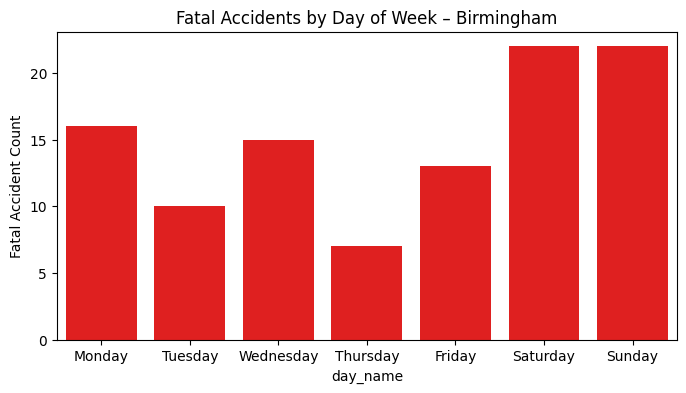

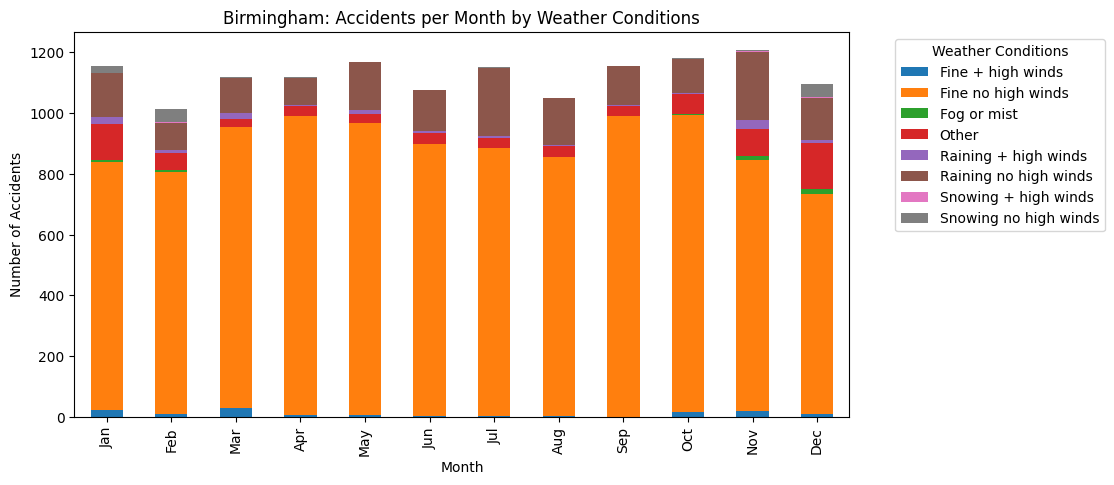

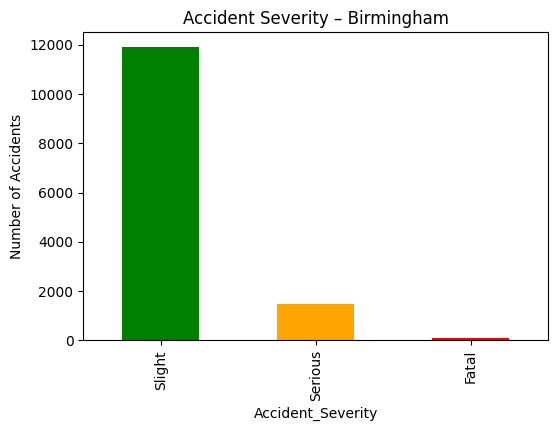

In [141]:
# Filter Birmingham data
birmingham = uk_accidents[uk_accidents["District Area"] == "Birmingham"]

# Day of week plot
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(8,4))
sns.countplot(data=birmingham, x="day_name", order=order)
plt.title("Accidents by Day of Week – Birmingham")
plt.ylabel("Accident Count")
plt.show()

birmingham_fatal = birmingham[birmingham["Accident_Severity"] == "Fatal"]

order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(8,4))
sns.countplot(data=birmingham_fatal, x="day_name", order=order, color="red")
plt.title("Fatal Accidents by Day of Week – Birmingham")
plt.ylabel("Fatal Accident Count")
plt.show()

birmingham_weather = birmingham.groupby(['month', 'Weather_Conditions']).size().unstack()

birmingham_weather.plot(kind='bar', stacked=True)
plt.title('Birmingham: Accidents per Month by Weather Conditions')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.legend(title='Weather Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(0, 12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.gcf().set_size_inches(10,5)
plt.show()

birmingham_severity = (
    uk_accidents[uk_accidents["District Area"] == "Birmingham"]["Accident_Severity"]
    .value_counts()
)
birmingham_severity.plot(kind="bar", color=["green","orange","red"], figsize=(6,4))
plt.title("Accident Severity – Birmingham")
plt.ylabel("Number of Accidents")
plt.show()

# Folium Heatmap
# coords = birmingham[["Latitude","Longitude"]].dropna()
# m = folium.Map(location=[coords["Latitude"].mean(), coords["Longitude"].mean()], zoom_start=11)
# HeatMap(coords.values.tolist(), radius=8).add_to(m)

# Save HTML for GitHub link
# m.save("birmingham_heatmap.html")

# 1️⃣ Inline map (works in Jupyter, not GitHub)
# IFrame("html_maps/birmingham_heatmap.html", width=800, height=500)

<h4><a href="html_maps/birmingham_heatmap.html">View Birmingham Heatmap (interactive)</a></h4>
<img src="images/birmingham.png" width="800">

<div style="border:2px solid #2E86C1; border-radius:10px; padding:15px; margin-bottom:20px; background:#F8F9F9;">

<h2 style="color:#2E86C1; text-align:center;">🚦 District: Birmingham</h2>

<h3 style="color:#117A65;">📊 Monthly Trends</h3> 
<blockquote style="background:#EBF5FB; padding:10px; border-left:5px solid #2E86C1;">
Birmingham tends to see a noticeable rise in traffic accidents during the winter months.
</blockquote>
<p><b>💡 Insight (26):</b> Cold weather brings challenges like icy roads, reduced visibility, and longer braking distances.</p>
<p><b>💡 Insight (27):</b> It’s reasonable to assume that many of these accidents could be prevented with better awareness and preparation. For example, public safety campaigns reminding drivers to slow down, check tire pressure, or avoid sudden braking on icy roads could make a real difference.</p>

<h3 style="color:#117A65;">🌦️ Weather Impact</h3> 
<blockquote style="background:#EBF5FB; padding:10px; border-left:5px solid #2E86C1;">
Most traffic accidents in Birmingham happen in good weather—sunny skies, dry roads, and no fog.
</blockquote>
<p><b>💡 Insight (28):</b> That might seem counterintuitive at first, but it makes sense when you consider how many more people are out and about during good weather. Rush hour, weekend outings, school runs—all that traffic increases the odds of collisions, even when conditions seem ideal.</p>
<p><b>💡 Insight (29):</b> Rain, on the other hand, tends to make accidents more severe. A sudden downpour during rush hour could easily turn a minor mistake into a major crash. Prioritizing better drainage systems and public reminders—like digital signs warning of slippery roads could help reduce these risks.</p>

<h3 style="color:#117A65;">⚠️ Accident Severity</h3> 
<blockquote style="background:#EBF5FB; padding:10px; border-left:5px solid #2E86C1;">
Slight accidents dominate, but serious accidents form a noticeable share.
</blockquote>
<p><b>💡 Insight (30):</b> Even with a relatively low fatality rate, the presence of serious accidents points to gaps in road safety enforcement. It’s reasonable to assume that stricter speed monitoring, better signage, or increased patrols in high-risk zones could help curb these incidents.</p>

<h3 style="color:#117A65;">🔥 Heatmap Findings</h3> 
<blockquote style="background:#EBF5FB; padding:10px; border-left:5px solid #2E86C1;">
Birmingham’s heatmap shows clusters in the city center and along major routes.
</blockquote>
<p><b>💡 Insight (31):</b> Accident clusters in Birmingham are most prominent in the city center and along major roads, which makes sense given the constant flow of vehicles in these areas. Busy junctions, roundabouts, and intersections—especially during rush hour—create more opportunities for collisions.</p>
<p><b>💡 Insight (32):</b> These high-traffic junctions are clearly risk zones, and targeted interventions could help.</p>

</div>
<hr>

<h3>Leeds Analysis</h3>

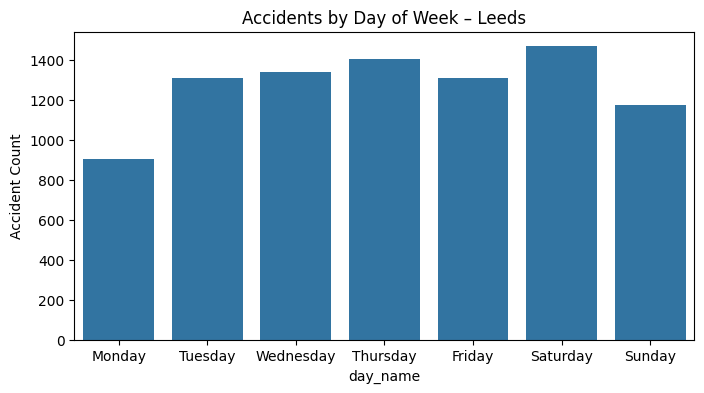

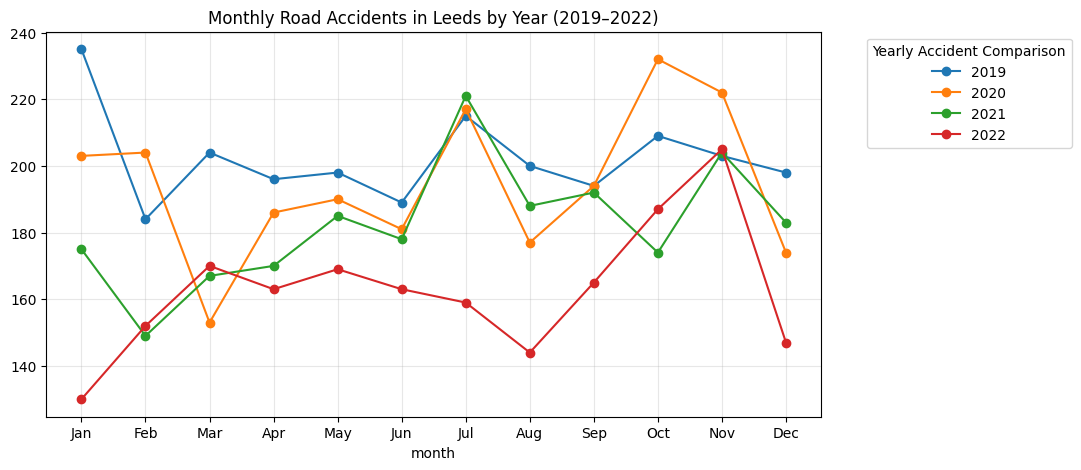

In [140]:
leeds = uk_accidents[uk_accidents["District Area"] == "Leeds"]

order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(8,4))
sns.countplot(data=leeds, x="day_name", order=order)
plt.title("Accidents by Day of Week – Leeds")
plt.ylabel("Accident Count")
plt.show()

# Monthly Accident Trends in Leeds (2019–2022)
leeds_df = uk_accidents[uk_accidents["District Area"] == "Leeds"]

monthly_leeds = leeds_df.groupby(['year', 'month']).size()
monthly_leeds = monthly_leeds.unstack(level=0)

monthly_leeds.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Leeds by Year (2019–2022)'
)

plt.xticks(
    range(1, 13), 
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
)
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

# coords = leeds[["Latitude","Longitude"]].dropna()
# m = folium.Map(location=[coords["Latitude"].mean(), coords["Longitude"].mean()], zoom_start=11)
# HeatMap(coords.values.tolist(), radius=8).add_to(m)
# m.save("leeds_heatmap.html")
# IFrame("html_maps/leeds_heatmap.html", width=800, height=500)

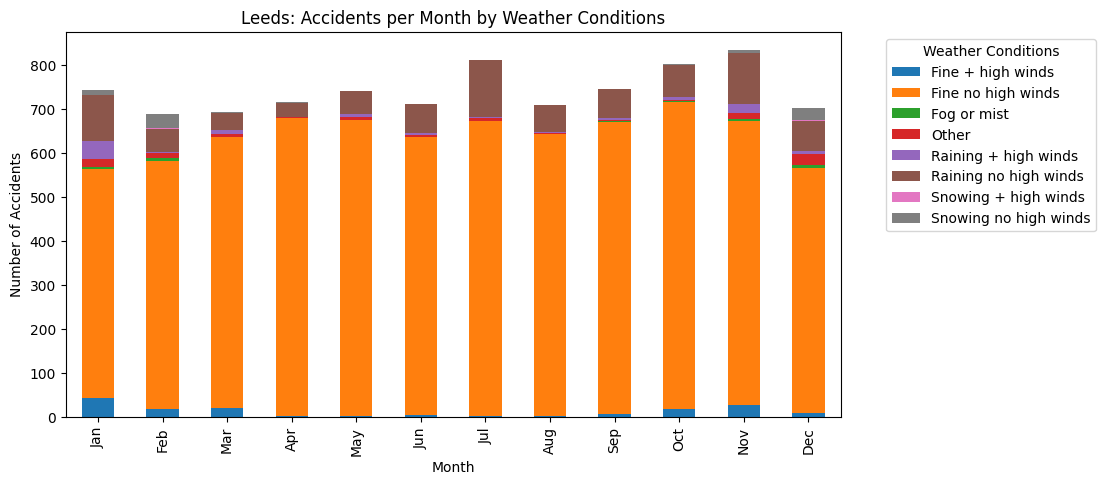

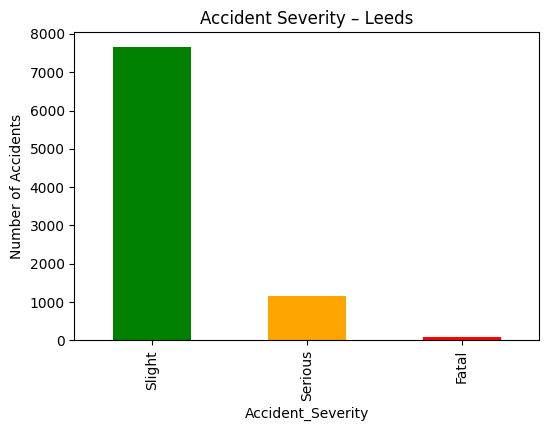

In [135]:
leeds_weather = leeds.groupby(['month', 'Weather_Conditions']).size().unstack()

leeds_weather.plot(kind='bar', stacked=True)
plt.title('Leeds: Accidents per Month by Weather Conditions')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.legend(title='Weather Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(0, 12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.gcf().set_size_inches(10,5)
plt.show()

leeds_severity = (
    uk_accidents[uk_accidents["District Area"] == "Leeds"]["Accident_Severity"]
    .value_counts()
)
leeds_severity.plot(kind="bar", color=["green","orange","red"], figsize=(6,4))
plt.title("Accident Severity – Leeds")
plt.ylabel("Number of Accidents")
plt.show()

<h4><a href="html_maps/leeds_heatmap.html">View  Heatmap (interactive)</a></h4>
<img src="images/leeds.png" width="800">

<div style="border:2px solid #2E86C1; border-radius:10px; padding:15px; margin-bottom:20px; background:#F8F9F9;">

<h2 style="color:#2E86C1; text-align:center;">🚦 District: Leeds</h2>

<h3 style="color:#117A65;">📊 Monthly Trends</h3> 
<blockquote style="background:#EBF5FB; padding:10px; border-left:5px solid #2E86C1;">
Leeds experiences a spike in accidents during autumn and early winter.
</blockquote>
<p><b>💡 Insight (33):</b> Shorter daylight hours mean more people are driving in the dark, which naturally raises risks. It’s similar to how in the Philippines, late‑afternoon rainstorms can suddenly make roads feel like nightfall—drivers have to adjust quickly to reduced visibility.</p>
<p><b>💡 Insight (34):</b> Public reminders—like roadside signs encouraging drivers to switch on headlights earlier or reduce speed—could help. The same principle applies in the Philippines when authorities post simple weather‑related advisories to keep drivers alert.</p>

<h3 style="color:#117A65;">🌦️ Weather Impact</h3> 
<blockquote style="background:#EBF5FB; padding:10px; border-left:5px solid #2E86C1;">
Clear weather dominates accident records, but fog and mist are linked with higher severity.
</blockquote>
<p><b>💡 Insight (35):</b> Most accidents happen in clear weather simply because more people are on the road. That’s also true in Metro Manila, where rush‑hour collisions are more common on dry days than during storms. But when fog does appear in Leeds, the crashes that follow are often more severe.</p>
<p><b>💡 Insight (36):</b> Reflective road paint or better lighting could make a big difference. It’s the same idea as the reflective lane markers on expressways in the Philippines—small details that guide drivers when visibility is poor.</p>

<h3 style="color:#117A65;">⚠️ Accident Severity</h3> 
<blockquote style="background:#EBF5FB; padding:10px; border-left:5px solid #2E86C1;">
Slight accidents dominate, but fatal cases appear more frequently in dark, unlit conditions.
</blockquote>
<p><b>💡 Insight (37):</b> Rural roads without lighting are especially risky. It’s not unlike provincial highways in Quezon or Batangas at night—drivers misjudge curves or fail to see pedestrians, and what could have been a minor scrape in daylight becomes a fatal crash.</p>

<h3 style="color:#117A65;">🔥 Heatmap Findings</h3> 
<blockquote style="background:#EBF5FB; padding:10px; border-left:5px solid #2E86C1;">
The heatmap shows concentration around central Leeds and highways.
</blockquote>
<p><b>💡 Insight (38):</b> The city center is crowded with buses, delivery riders, and pedestrians, making it a natural hotspot. It’s similar to busy commercial areas in Manila, where congestion and constant movement create endless opportunities for collisions.</p>
<p><b>💡 Insight (39):</b> Highways near Leeds also show repeated accident clusters. That’s comparable to stretches of SLEX where fast driving suddenly meets bottlenecks—variable speed limits or stricter monitoring could help smooth out these danger zones.</p>

</div>
<hr>


<h3>Manchester Analysis</h3>

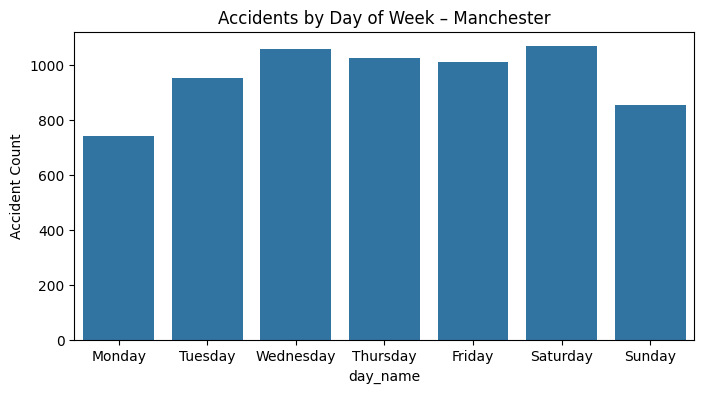

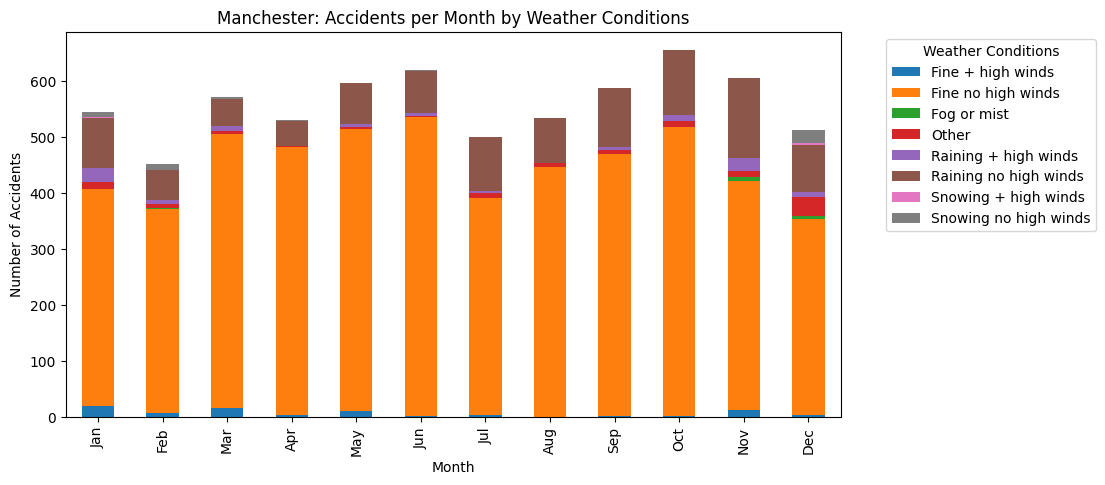

In [139]:
manchester = uk_accidents[uk_accidents["District Area"] == "Manchester"]

order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(8,4))
sns.countplot(data=manchester, x="day_name", order=order)
plt.title("Accidents by Day of Week – Manchester")
plt.ylabel("Accident Count")
plt.show()

manchester_weather = manchester.groupby(['month', 'Weather_Conditions']).size().unstack()

manchester_weather.plot(kind='bar', stacked=True)
plt.title('Manchester: Accidents per Month by Weather Conditions')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.legend(title='Weather Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(0, 12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.gcf().set_size_inches(10,5)
plt.show()

# coords = manchester[["Latitude","Longitude"]].dropna()
# m = folium.Map(location=[coords["Latitude"].mean(), coords["Longitude"].mean()], zoom_start=11)
# HeatMap(coords.values.tolist(), radius=8).add_to(m)
# m.save("manchester_heatmap.html")
# IFrame("html_maps/manchester_heatmap.html", width=800, height=500)

<h4><a href="html_maps/manchester_heatmap.html">View Manchester Heatmap (interactive)</a></h4>
<img src="images/manchester.png" width="800">

<div style="border:2px solid #2E86C1; border-radius:10px; padding:15px; margin-bottom:20px; background:#F8F9F9;">

<h2 style="color:#2E86C1; text-align:center;">🚦 District: Manchester</h2>

<h3 style="color:#117A65;">📊 Monthly Trends</h3> 
<blockquote style="background:#EBF5FB; padding:10px; border-left:5px solid #2E86C1;">
Manchester’s accidents remain consistently high throughout the year with a small winter peak.
</blockquote>
<p><b>💡 Insight (40):</b> Unlike other districts where accidents rise and fall with the seasons, Manchester’s traffic congestion keeps accident levels high year‑round. It’s a bit like Metro Manila, where EDSA is always busy—rain or shine—so collisions happen regularly, not just during certain months.</p>
<p><b>💡 Insight (41):</b> Policies that ease congestion—such as better public transport or staggered work hours—could help. In the Philippines, cities that expand bus or rail options often see fewer private cars on the road, which reduces accident exposure. Manchester could benefit from similar approaches.</p>

<h3 style="color:#117A65;">🌦️ Weather Impact</h3> 
<blockquote style="background:#EBF5FB; padding:10px; border-left:5px solid #2E86C1;">
Rain-related accidents form a significant portion in Manchester.
</blockquote>
<p><b>💡 Insight (42):</b> Persistent rainfall makes roads slick and braking distances longer. It’s not unlike driving in Quezon or Laguna during the rainy season—when a sudden downpour can turn a routine trip into a risky one, especially on crowded roads.</p>
<p><b>💡 Insight (43):</b> Skid‑resistant road surfaces and better drainage would help reduce risks. In the Philippines, poorly drained roads often flood quickly, forcing drivers to swerve or brake suddenly. Manchester’s challenge is similar, though with rain instead of floods.</p>

<h3 style="color:#117A65;">⚠️ Accident Severity</h3> 
<blockquote style="background:#EBF5FB; padding:10px; border-left:5px solid #2E86C1;">
Manchester records more multi-vehicle serious accidents than many other districts.
</blockquote>
<p><b>💡 Insight (44):</b> Heavy congestion means one mistake can ripple through dozens of vehicles. Think of a jeepney suddenly stopping in Manila traffic—except in Manchester it’s often multiple cars on a motorway, leading to pile‑ups that are harder to manage and more severe.</p>

<h3 style="color:#117A65;">🔥 Heatmap Findings</h3> 
<blockquote style="background:#EBF5FB; padding:10px; border-left:5px solid #2E86C1;">
The heatmap reveals dense clustering along major arterial roads.
</blockquote>
<p><b>💡 Insight (45):</b> Accident hotspots align with busy commuter corridors, where traffic is relentless. This is similar to Commonwealth Avenue in Quezon City—nicknamed the “killer highway”—where high traffic volume and speed combine to create frequent accidents.</p>
<p><b>💡 Insight (46):</b> Smarter traffic signals, variable speed limits, and stricter enforcement could help. In the Philippines, MMDA sometimes deploys traffic enforcers or adjusts signal timing in hotspots; Manchester could apply its own version of these interventions.</p>

</div>
<hr>


<h3>Sheffield Analysis</h3>

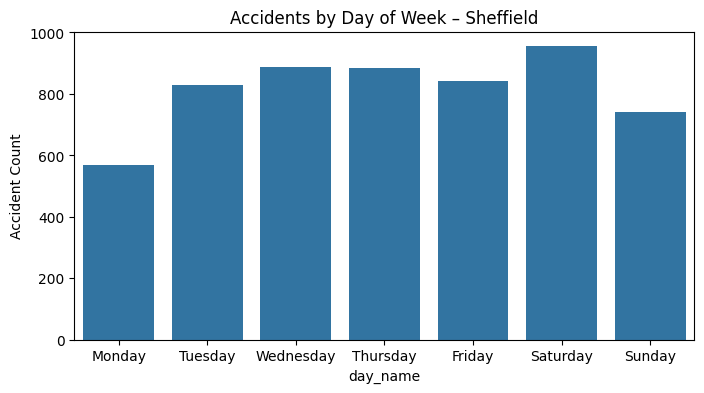

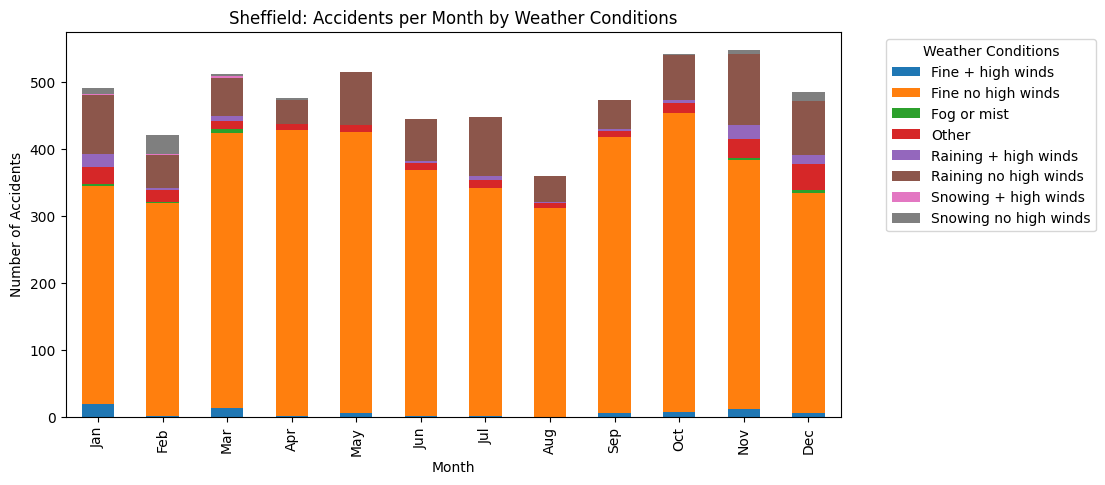

In [138]:
sheffield = uk_accidents[uk_accidents["District Area"] == "Sheffield"]

order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(8,4))
sns.countplot(data=sheffield, x="day_name", order=order)
plt.title("Accidents by Day of Week – Sheffield")
plt.ylabel("Accident Count")
plt.show()

sheffield_weather = sheffield.groupby(['month', 'Weather_Conditions']).size().unstack()

sheffield_weather.plot(kind='bar', stacked=True)
plt.title('Sheffield: Accidents per Month by Weather Conditions')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.legend(title='Weather Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(0, 12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.gcf().set_size_inches(10,5)
plt.show()

# coords = sheffield[["Latitude","Longitude"]].dropna()
# m = folium.Map(location=[coords["Latitude"].mean(), coords["Longitude"].mean()], zoom_start=11)
# HeatMap(coords.values.tolist(), radius=8).add_to(m)
# m.save("sheffield_heatmap.html")
# IFrame("html_maps/sheffield_heatmap.html", width=800, height=500)

<h4><a href="html_maps/sheffield_heatmap.html">View Sheffield Heatmap (interactive)</a></h4>
<img src="images/sheffield.png" width="800">

<div style="border:2px solid #2E86C1; border-radius:10px; padding:15px; margin-bottom:20px; background:#F8F9F9;">

<h2 style="color:#2E86C1; text-align:center;">🚦 District: Sheffield</h2>

<h3 style="color:#117A65;">📊 Monthly Trends</h3> 
<blockquote style="background:#EBF5FB; padding:10px; border-left:5px solid #2E86C1;">
Sheffield shows higher accident rates in late winter and early spring.
</blockquote>
<p><b>💡 Insight (47):</b> Seasonal transitions are often the most dangerous. Drivers go from icy roads in February to heavy rain in March, and that sudden shift catches people off guard. It’s similar to how in the Philippines, the first heavy rains after summer often lead to more crashes—roads are slick, and drivers haven’t adjusted yet.</p>
<p><b>💡 Insight (48):</b> Public reminders during these transition periods could help. For example, roadside signs or radio updates warning of changing conditions would give drivers that extra nudge to slow down and stay alert.</p>

<h3 style="color:#117A65;">🌦️ Weather Impact</h3> 
<blockquote style="background:#EBF5FB; padding:10px; border-left:5px solid #2E86C1;">
Accidents rise sharply during rain and snow in Sheffield.
</blockquote>
<p><b>💡 Insight (49):</b> Sheffield’s hilly terrain makes slippery conditions especially risky. A car losing traction on an incline can quickly become uncontrollable. In the Philippines, you see a similar challenge on steep provincial roads in Baguio or Antipolo when rain makes the surface slick.</p>
<p><b>💡 Insight (50):</b> Localized snow and ice management—like targeted gritting on steep roads—would directly address these risks. It’s the same principle as deploying sand or gravel on slippery mountain roads in the Philippines to improve traction.</p>

<h3 style="color:#117A65;">⚠️ Accident Severity</h3> 
<blockquote style="background:#EBF5FB; padding:10px; border-left:5px solid #2E86C1;">
Sheffield shows a relatively higher rate of fatalities compared to other urban areas.
</blockquote>
<p><b>💡 Insight (51):</b> Rural and high‑speed roads just outside Sheffield contribute to more deadly accidents. It’s not unlike expressways in the Philippines—once you leave the city, speeds increase, lighting is limited, and a single mistake can have severe consequences.</p>

<h3 style="color:#117A65;">🔥 Heatmap Findings</h3> 
<blockquote style="background:#EBF5FB; padding:10px; border-left:5px solid #2E86C1;">
Heatmap hotspots occur both in city center and outer rural roads.
</blockquote>
<p><b>💡 Insight (52):</b> Rural hotspots highlight the need for speed enforcement and better signage outside the city. In the Philippines, this is similar to provincial highways where drivers underestimate risks and accidents cluster in certain stretches.</p>
<p><b>💡 Insight (53):</b> City center hotspots reflect the risks of high‑density traffic—delivery vans, buses, and pedestrians all competing for space. It’s comparable to downtown Manila, where congestion and constant movement create frequent collision points.</p>

</div>
<hr>


<h3>Bradford Analysis</h3>

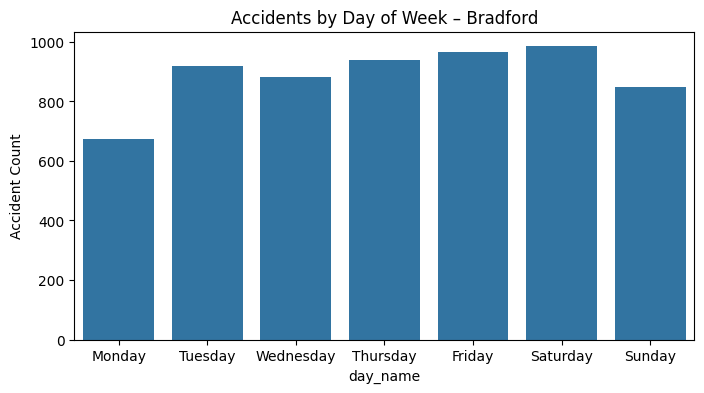

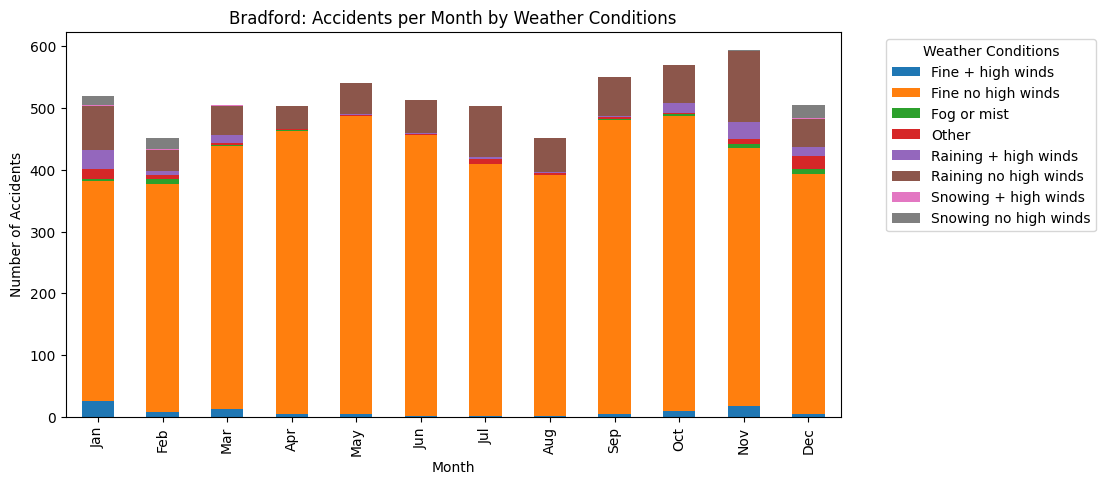

In [137]:
bradford = uk_accidents[uk_accidents["District Area"] == "Bradford"]

order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(8,4))
sns.countplot(data=bradford, x="day_name", order=order)
plt.title("Accidents by Day of Week – Bradford")
plt.ylabel("Accident Count")
plt.show()

bradford_weather = bradford.groupby(['month', 'Weather_Conditions']).size().unstack()

bradford_weather.plot(kind='bar', stacked=True)
plt.title('Bradford: Accidents per Month by Weather Conditions')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.legend(title='Weather Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(0, 12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.gcf().set_size_inches(10,5)
plt.show()

# coords = bradford[["Latitude","Longitude"]].dropna()
# m = folium.Map(location=[coords["Latitude"].mean(), coords["Longitude"].mean()], zoom_start=11)
# HeatMap(coords.values.tolist(), radius=8).add_to(m)
# m.save("bradford_heatmap.html")
# IFrame("html_maps/bradford_heatmap.html", width=800, height=500)

<h4><a href="html_maps/bradford_heatmap.html">View Bradford Heatmap (interactive)</a></h4>
<img src="images/bradford.png" width="800">

<div style="border:2px solid #2E86C1; border-radius:10px; padding:15px; margin-bottom:20px; background:#F8F9F9;">

<h2 style="color:#2E86C1; text-align:center;">🚦 District: Bradford</h2>

<h3 style="color:#117A65;">📊 Monthly Trends</h3> 
<blockquote style="background:#EBF5FB; padding:10px; border-left:5px solid #2E86C1;">
Bradford accidents peak in foggy autumn months.
</blockquote>
<p><b>💡 Insight (54):</b> Fog reduces visibility to just a few meters, making even familiar roads unpredictable. It’s a bit like driving in Tagaytay or Baguio early in the morning when the fog rolls in—you suddenly can’t see the vehicle ahead until it’s dangerously close.</p>
<p><b>💡 Insight (55):</b> Public reminders to slow down and use headlights in fog could help. In the Philippines, authorities often post simple weather‑related advisories; Bradford could benefit from similar seasonal alerts tailored to fog conditions.</p>

<h3 style="color:#117A65;">🌦️ Weather Impact</h3> 
<blockquote style="background:#EBF5FB; padding:10px; border-left:5px solid #2E86C1;">
Severe accidents are disproportionately high under fog conditions in Bradford.
</blockquote>
<p><b>💡 Insight (56):</b> Low visibility doesn’t just increase accident frequency—it makes outcomes worse. A driver who can’t see hazards until the last second is more likely to crash at full speed. It’s similar to how sudden downpours on busy expressways can turn a minor mistake into a major collision.</p>
<p><b>💡 Insight (57):</b> Fog sensors and smart signage that trigger warnings—like the electronic message boards you sometimes see on roads—are simple but effective ways to alert drivers to hidden dangers ahead.</p>

<h3 style="color:#117A65;">⚠️ Accident Severity</h3> 
<blockquote style="background:#EBF5FB; padding:10px; border-left:5px solid #2E86C1;">
Fatal cases, though rare, show up more often during fog or wet roads in Bradford.
</blockquote>
<p><b>💡 Insight (58):</b> When visibility is poor and the road is slick, even small mistakes can be deadly. Think of a truck braking late on a wet provincial highway—what could have been a minor bump in good conditions becomes a serious crash.</p>

<h3 style="color:#117A65;">🔥 Heatmap Findings</h3> 
<blockquote style="background:#EBF5FB; padding:10px; border-left:5px solid #2E86C1;">
Heatmap reveals clusters in industrial and suburban zones.
</blockquote>
<p><b>💡 Insight (59):</b> Industrial traffic, like delivery trucks, likely contributes to suburban hotspots. It’s similar to Cavite or Laguna, where factory trucks mix with residential traffic on smaller roads not designed for heavy loads.</p>
<p><b>💡 Insight (60):</b> Enforcing truck‑specific safety measures—such as designated lanes or stricter speed limits—could reduce risks in these mixed‑use zones, just as truck curfews are sometimes used in Metro Manila to ease congestion and improve safety.</p>

</div>
<hr>

<h3>Liverpool Analysis</h3>

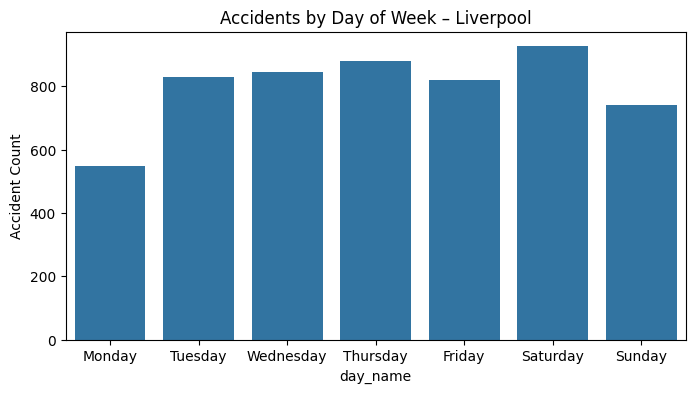

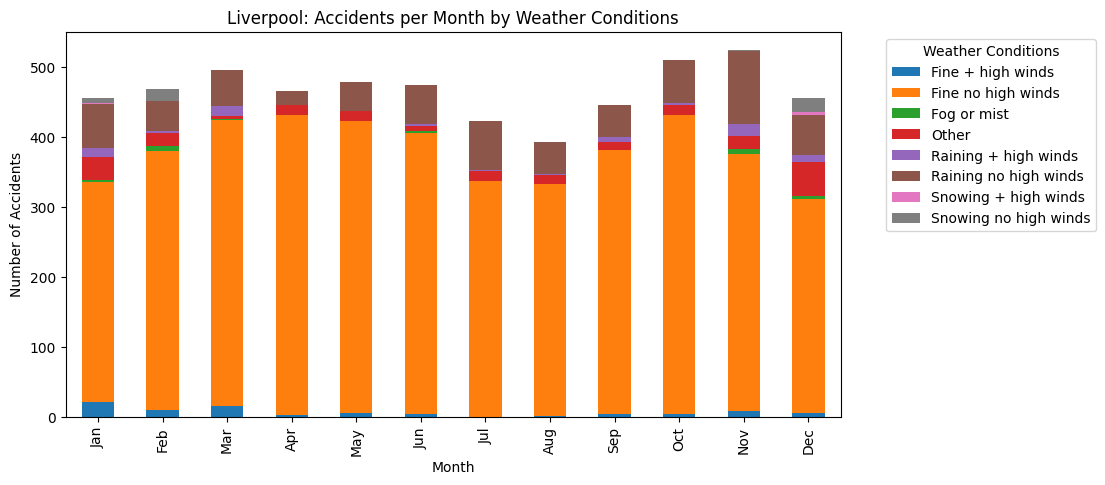

In [142]:
liverpool = uk_accidents[uk_accidents["District Area"] == "Liverpool"]

order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(8,4))
sns.countplot(data=liverpool, x="day_name", order=order)
plt.title("Accidents by Day of Week – Liverpool")
plt.ylabel("Accident Count")
plt.show()

liverpool_weather = liverpool.groupby(['month', 'Weather_Conditions']).size().unstack()

liverpool_weather.plot(kind='bar', stacked=True)
plt.title('Liverpool: Accidents per Month by Weather Conditions')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.legend(title='Weather Conditions', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(range(0, 12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.gcf().set_size_inches(10,5)
plt.show()

# coords = liverpool[["Latitude","Longitude"]].dropna()
# m = folium.Map(location=[coords["Latitude"].mean(), coords["Longitude"].mean()], zoom_start=11)
# HeatMap(coords.values.tolist(), radius=8).add_to(m)
# m.save("liverpool_heatmap.html")
# IFrame("html_maps/liverpool_heatmap.html", width=800, height=500)

<h4><a href="html_maps/liverpool_heatmap.html">View Liverpool Heatmap (interactive)</a></h4>
<img src="images/liverpool.png" width="800">

<div style="border:2px solid #2E86C1; border-radius:10px; padding:15px; margin-bottom:20px; background:#F8F9F9;">

<h2 style="color:#2E86C1; text-align:center;">🚦 District: Liverpool</h2>

<h3 style="color:#117A65;">📊 Monthly Trends</h3> 
<blockquote style="background:#EBF5FB; padding:10px; border-left:5px solid #2E86C1;">
Liverpool accidents rise sharply in summer months.
</blockquote>
<p><b>💡 Insight (61):</b> Summer brings more trips—day outings, events, and tourism—so road activity naturally increases. It’s similar to peak travel periods in the Philippines when families head to beaches or provinces; with more vehicles on the road, even small lapses in attention can result in collisions.</p>
<p><b>💡 Insight (62):</b> Targeted traffic management during busy seasons helps. Temporary speed limits near popular areas, clear wayfinding for visitors, and increased patrols can reduce friction points—akin to how local authorities in the Philippines deploy extra traffic personnel during long weekends to manage surges.</p>

<h3 style="color:#117A65;">🌦️ Weather Impact</h3> 
<blockquote style="background:#EBF5FB; padding:10px; border-left:5px solid #2E86C1;">
Clear weather accidents dominate Liverpool’s records.
</blockquote>
<p><b>💡 Insight (63):</b> When the weather is good, more people drive, and volumes rise—so most crashes happen on clear days. This mirrors Metro Manila patterns: busy, dry rush hours tend to see more minor collisions than stormy days when fewer people venture out.</p>
<p><b>💡 Insight (64):</b> Behavior-focused campaigns are effective in good weather. Gentle reminders about speed discipline, safe following distances, and avoiding distractions can curb the “sunny day complacency” that often leads to avoidable crashes.</p>

<h3 style="color:#117A65;">⚠️ Accident Severity</h3> 
<blockquote style="background:#EBF5FB; padding:10px; border-left:5px solid #2E86C1;">
Liverpool has a notable share of motorcycle-related fatalities.
</blockquote>
<p><b>💡 Insight (65):</b> Motorcyclists face higher exposure and less protection, so outcomes can be severe. The dynamic is familiar in the Philippines, where motorcycles weave through traffic but are vulnerable at intersections and lane merges. Consistent helmet use, visible lane markings, and clearer rules on filtering can reduce risk.</p>

<h3 style="color:#117A65;">🔥 Heatmap Findings</h3> 
<blockquote style="background:#EBF5FB; padding:10px; border-left:5px solid #2E86C1;">
Liverpool heatmap clusters around city center and dock areas.
</blockquote>
<p><b>💡 Insight (66):</b> Mixed-use roads near docks bring heavy vehicles, deliveries, and regular traffic into the same space—raising the odds of conflict. It’s comparable to port-adjacent corridors in Manila where trucks and passenger vehicles share tight urban routes.</p>
<p><b>💡 Insight (67):</b> Practical measures—like designated truck windows, clearer lane separation, and speed management—can smooth these corridors and reduce collisions without slowing commerce.</p>

</div>
<hr>